In [3]:
'''
VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

'''

'\nVARIABLE DESCRIPTIONS:\nsurvival        Survival\n                (0 = No; 1 = Yes)\npclass          Passenger Class\n                (1 = 1st; 2 = 2nd; 3 = 3rd)\nname            Name\nsex             Sex\nage             Age\nsibsp           Number of Siblings/Spouses Aboard\nparch           Number of Parents/Children Aboard\nticket          Ticket Number\nfare            Passenger Fare\ncabin           Cabin\nembarked        Port of Embarkation\n                (C = Cherbourg; Q = Queenstown; S = Southampton)\n\nSPECIAL NOTES:\nPclass is a proxy for socio-economic status (SES)\n 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower\n\nAge is in Years; Fractional if Age less than One (1)\n If the Age is Estimated, it is in the form xx.5\n\nWith respect to the family relation variables (i.e. sibsp and parch)\nsome relations were ignored.  The following are the definitions used\nfor sibsp and parch.\n\nSibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic\nSpouse:   Husb

In [4]:
from os import listdir
print  listdir('.')

['.ipynb_checkpoints', 'Baysball', 'lahman-csv_2015-01-24.zip', 'Lesson4.ipynb', 'titanic_data.csv', 'titatnic_desc.txt', 'titatnic_desc.txt~']


In [5]:
import pandas as pn
titanic = pn.DataFrame.from_csv('titanic_data.csv')

print titanic.columns, '\n'

print titanic.dtypes





Index([u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object') 

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


In [6]:
print titanic.head()

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex  Age  \
PassengerId                                                                   
1                                      Braund, Mr. Owen Harris    male   22   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38   
3                                       Heikkinen, Miss. Laina  female   26   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35   
5                                     Allen, Mr. William Henry    male   35   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2   

In [7]:
print titanic.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name=u'PassengerId', length=891)


In [8]:
print titanic.describe

<bound method DataFrame.describe of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   
11                  1       3   
12                  1       1   
13                  0       3   
14                  0       3   
15                  0       3   
16                  1       2   
17                  0       3   
18                  1       2   
19                  0       3   
20                  1       3   
21                  0       2   
22                  1       2   
23                  1       3   
24                  1       1   
25                  0       3   
26                  1       3   
27                  0       3   
28     

Total passangers: 891
Survived passangers: 342
Survived ratio: 38.4 %


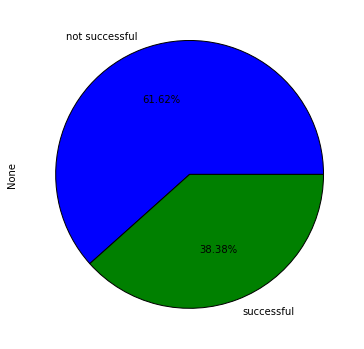

In [9]:
%matplotlib inline


passangers_num = len(titanic['Survived'])
Survived_num = sum(titanic['Survived'])
Survived_ratio = round(float(Survived_num)/passangers_num ,3)

print 'Total passangers:',passangers_num
print 'Survived passangers:', Survived_num
print 'Survived ratio:', Survived_ratio*100, '%'

Survived_gb= titanic.groupby('Survived')['Survived'].size()
Survived_gb.plot(kind='pie', figsize=(6,6), labels=['not successful', 'successful'], autopct='%.2f%%')

In [10]:
Surviced_Sex_gb= titanic.groupby(['Survived','Sex']).size()
Surviced_Sex_gb2=Surviced_Sex_gb.reset_index()
Surviced_Sex_gb2.columns=['Survived', 'Sex', 'Num']
print Surviced_Sex_gb2

Survived_Sex= titanic.groupby(['Sex']).size()
Survived_Sex= Survived_Sex.reset_index()
Survived_Sex.columns=[ 'Sex', 'Num']
print Survived_Sex


   Survived     Sex  Num
0         0  female   81
1         0    male  468
2         1  female  233
3         1    male  109
      Sex  Num
0  female  314
1    male  577


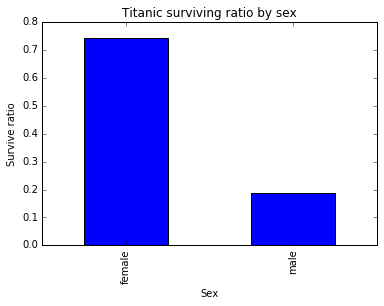

In [11]:
result = pn.merge(Surviced_Sex_gb2, Survived_Sex, on ='Sex', how ='inner')
result.columns =['Survived', 'Sex', 'Num', 'Sex_total']
result['share']=result['Num']/result['Sex_total']

SurvivedBySex= result[result['Survived']==1][['Sex', 'share']] 
SurvivedBySex.reset_index()
SurvivedBySex.index=SurvivedBySex['Sex']
del SurvivedBySex['Sex']

p=SurvivedBySex.plot.bar(legend=False, title ='Titanic surviving ratio by sex')
p.set_ylabel('Survive ratio')



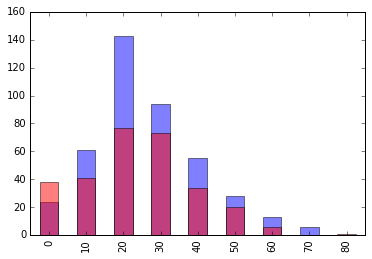

In [50]:
import pandas as pn
import numpy as np
titanic = pn.DataFrame.from_csv('titanic_data.csv')

SurvivedAge= titanic.groupby(['Survived','Age']).size()
SurvivedAge=SurvivedAge.reset_index()
SurvivedAge.columns=['Survived', 'Age', 'Num']
SurvivedAge.index=(SurvivedAge['Survived'])
del SurvivedAge['Survived']

SurvivedAget=SurvivedAge.reset_index().pivot( 'Age', 'Survived','Num')
SurvivedAget.columns=['No', 'Yes']

TestNo=SurvivedAget['No']

bins=[0,10,20,30,40,50,60,70,80,100]

t=TestNo.groupby(np.digitize(TestNo.index, bins))
t2=t.sum()
t2.index = bins[0:9]
t2.plot(kind='bar', alpha=0.5)

TestYes=SurvivedAget['Yes']

bins=[0,10,20,30,40,50,60,70,80,100]

t=TestYes.groupby(np.digitize(TestYes.index, bins))
t2=t.sum()
t2.index = bins[0:9]
t2.plot(kind='bar', alpha=0.5, color='red')

#bins = np.linspace(df.a.min(), df.a.max(), 10)
#groups = df.groupby(np.digitize(df.a, bins))

#SurvivedAget.plot(kind='hist', bins=10)

#SurvivedAget.hist()

